#### General Steps to Follow

1. Importing Packages
1. Load Data and Build Generator & Discriminator Models
1. Training GAN
1. Generating Images
1. Saving the Generator Model

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## 1) Importing Packages

#### Add the repository directory path to the Python path

In [2]:
import os
import sys

REPO_DIR_PATH = os.path.normpath(os.path.join(
    os.path.join(os.path.dirname(os.getcwd()))))

sys.path.append(REPO_DIR_PATH)

In [4]:
from src.train_model import ModelTrainer
import tensorflow as tf
import matplotlib.pyplot as plt

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## 2) Load Data and Build Generator & Discriminator Models

In [6]:
trainer = ModelTrainer()

In [4]:
real_images = trainer.load_data()
real_images.shape

(60000, 28, 28, 1)

In [5]:
generator = trainer.build_generator()
generator.summary()

/home/amro/anaconda3/envs/ai1/lib/python3.9/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [6]:
discriminator = trainer.build_discriminator()
discriminator.summary()

/home/amro/anaconda3/envs/ai1/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## 3) Training GAN

In [7]:
EPOCHS = 100
BATCH_SIZE = 256
NOISE_DIM = 100
BUFFER_SIZE = 60000

2024-08-02 18:49:20.860943: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-08-02 18:49:20.958371: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-08-02 18:52:44.951440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1, Discriminator Loss: 1.549124836921692, Generator Loss: 0.6551291942596436


2024-08-02 18:56:17.081951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2, Discriminator Loss: 1.0644400119781494, Generator Loss: 0.9644534587860107


2024-08-02 18:59:48.466123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 3, Discriminator Loss: 1.0807864665985107, Generator Loss: 0.9412777423858643


2024-08-02 19:03:21.239224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4, Discriminator Loss: 0.944911777973175, Generator Loss: 1.1078145503997803


2024-08-02 19:06:52.232331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 5, Discriminator Loss: 1.51456880569458, Generator Loss: 0.7852944135665894


2024-08-02 19:10:29.169967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6, Discriminator Loss: 1.2516553401947021, Generator Loss: 0.8669259548187256


2024-08-02 19:14:18.577679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 7, Discriminator Loss: 1.3770496845245361, Generator Loss: 0.7754935026168823


KeyboardInterrupt: 

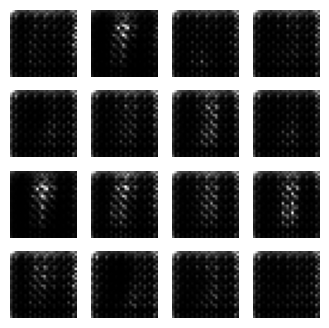

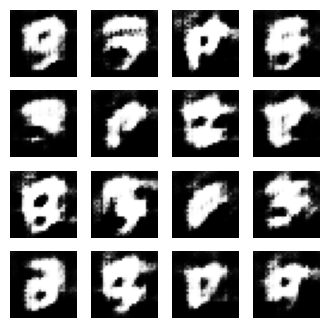

In [8]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(real_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
trainer.train(train_dataset, NOISE_DIM, generator, discriminator, EPOCHS, BATCH_SIZE)

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## 4) Generating Images

In [19]:
def generate_and_save_images(generator_model, noise_dim):    
    noise = tf.random.normal([16, noise_dim])
    predictions = generator_model(noise, training=False)
    # 2 - Plot the generated images
    fig = plt.figure(figsize=(4,4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    #plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()
    return fig

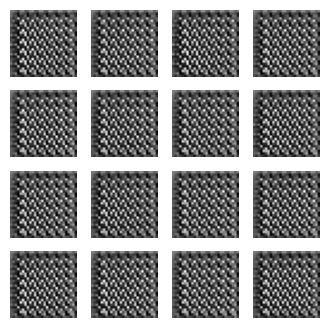

In [20]:
f = generate_and_save_images(generator, 100)